In [50]:
%%latex
\tableofcontents

<IPython.core.display.Latex object>

# **Divergence types, usage in Neural networks and minimizing them using Gradient descent** 

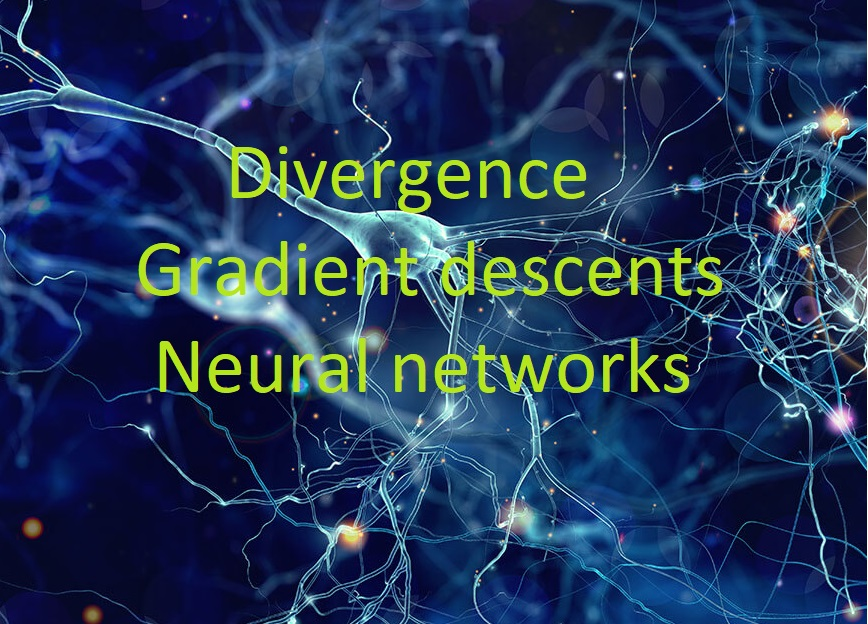

## Introduction
In this project we will discuss the Divergence types, namly **KL Divergence and Jensen-Shannon Divergence** and try to explain with example how we can use them to measure similarity or difference between the distribuations.

We will also Implement the ***minimizing of KL Divergence for Normal Distribuation*** using Gradient Descent in Tensorflows and plot the results of training and showing how to achiving minimum KL divergence.

We will aslo show the ussage of ***KL Divergence in Neural networks training models*** and how we can acheive better training and better output results in Neural Networks.

## Types of Divergences
It is often desirable to quantify the difference between probability distributions for a given random variable.
This occurs frequently in machine learning, when we may be interested in calculating the difference between an actual and observed probability distribution.

We can achieve our objective using techniques from information theory, such as 
italicized text 
*   Kullback-Leibler Divergence (KL divergence), or relative entropy
*   Jensen-Shannon Divergence



### Kullback-Leibler Divergence

P=1.000 Q=1.000


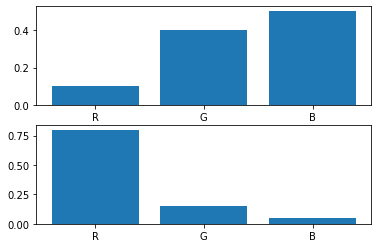

In [ ]:
# plot of distributions
from matplotlib import pyplot
# define distributions
events = ['R', 'G', 'B']
p = [0.10, 0.40, 0.50]
q = [0.80, 0.15, 0.05]
print('P=%.3f Q=%.3f' % (sum(p), sum(q)))
# plot first distribution
pyplot.subplot(2,1,1)
pyplot.bar(events, p)
# plot second distribution
pyplot.subplot(2,1,2)
pyplot.bar(events, q)
# show the plot
pyplot.show()

KL divergence can be calculated as the negative sum of probability of each event in P multiplied by the log of the probability of the event in Q over the probability of the event in P.

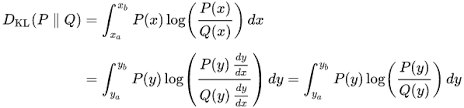

Now we can calculate KL divergene for p,q and q,p.
Using custom build fuction namly kl_divergence

In [ ]:
from math import log
 
# calculate the kl divergence
def kl_divergence(p, q):
	return sum(p[i] * log(p[i]/q[i]) for i in range(len(p)))
 
# define distributions
p = [0.10, 0.40, 0.50]
q = [0.80, 0.15, 0.05]
# calculate (P || Q)
kl_pq = kl_divergence(p, q)
print('KL(P || Q): %.3f bits' % kl_pq)
# calculate (Q || P)
kl_qp = kl_divergence(q, p)
print('KL(Q || P): %.3f bits' % kl_qp)

KL(P || Q): 1.336 bits
KL(Q || P): 1.401 bits


As show above we can see that KL divergene is not symetric and we have different values if we change the places of p and q.

Now we will use the scipy library and try to find kl divergene using its package relative entropy.

In [ ]:
from scipy.special import rel_entr
# define distributions
p = [0.10, 0.40, 0.50]
q = [0.80, 0.15, 0.05]
# calculate (P || Q)
kl_pq = rel_entr(p, q)
print('KL(P || Q): %.3f nats' % sum(kl_pq))
# calculate (Q || P)
kl_qp = rel_entr(q, p)
print('KL(Q || P): %.3f nats' % sum(kl_qp))

KL(P || Q): 1.336 nats
KL(Q || P): 1.401 nats


So, we have verified our result as answers from custom build kl_divergene function and one from scipy are same.

### Jensen-Shannon Divergence

The Jensen-Shannon divergence, or JS divergence for short, is another way to quantify the difference (or similarity) between two probability distributions.

It uses the KL divergence to calculate a normalized score that is symmetrical. This means that the divergence of P from Q is the same as Q from P, or stated formally:

JS(P || Q) == JS(Q || P)

And JS divergence is calculate by 

JS(P || Q) = 1/2 * KL(P || M) + 1/2 * KL(Q || M)

M = (1/2 * (P + Q))

It is more useful as a measure as it provides a smoothed and normalized version of KL divergence, with scores between 0 (identical) and 1 (maximally different), when using the base-2 logarithm.

The square root of the score gives a quantity referred to as the Jensen-Shannon distance, or JS distance for short.

In [ ]:
# example of calculating the js divergence between two mass functions
from math import log2
from math import sqrt
from numpy import asarray

# calculate the kl divergence
def kl_divergence(p, q):
	return sum(p[i] * log2(p[i]/q[i]) for i in range(len(p)))

# calculate the js divergence
def js_divergence(p, q):
	m = 0.5 * (p + q)
	return 0.5 * kl_divergence(p, m) + 0.5 * kl_divergence(q, m)

# define distributions
p = asarray([0.10, 0.40, 0.50])
q = asarray([0.80, 0.15, 0.05])
# calculate JS(P || Q)
js_pq = js_divergence(p, q)
print('JS(P || Q) divergence: %.3f bits' % js_pq)
print('JS(P || Q) distance: %.3f' % sqrt(js_pq))
# calculate JS(Q || P)
js_qp = js_divergence(q, p)
print('JS(Q || P) divergence: %.3f bits' % js_qp)
print('JS(Q || P) distance: %.3f' % sqrt(js_qp))

JS(P || Q) divergence: 0.420 bits
JS(P || Q) distance: 0.648
JS(Q || P) divergence: 0.420 bits
JS(Q || P) distance: 0.648


Executing example code we get to know that JS divergence between the distributions is about 0.42 bits and that the distance is about 0.648.

We can see that the calculation is symmetrical, giving the same score and distance measure for JS(P || Q) and JS(Q || P).
### Conclusion KL vs JS Divergence
Hence we can you KL divergence for find the quick similarity between distribuations and if we want symmetric results then we can proceed with the JS divergence

## Minimizing KL Divergence of Normal Distribuation using gradient descent

In [ ]:
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt
import tensorflow.compat.v1 as tf
import seaborn as sns
sns.set()

Lets create a probability distribution with a 0 mean and 2 variance. Then, we create another distribution with random parameters.

In [ ]:
x = np.arange(-10, 10, 0.001)
p_pdf = norm.pdf(x, 0, 2).reshape(1, -1)
np.random.seed(0)
random_mean = np.random.randint(10, size=1)
random_sigma = np.random.randint(10, size=1)
random_pdf = norm.pdf(x, random_mean, random_sigma).reshape(1, -1)

/usr/local/lib/python3.7/dist-packages/scipy/stats/_distn_infrastructure.py:1740: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


Now lets set learning and epoch parameters and assign the normal distribuations 

In [ ]:
learning_rate = 0.001
epochs = 100
tf.compat.v1.disable_eager_execution()
p = tf.placeholder(tf.float64, shape=p_pdf.shape)
mu = tf.Variable(np.zeros(1))
sigma = tf.Variable(np.eye(1))
normal = tf.exp(-tf.square(x - mu) / (2 * sigma))
q = normal / tf.reduce_sum(normal)

Defining new function for KL divergence.We need to make sure that we don’t include any probabilities equal to 0 because the log of 0 is negative infinity.

In [ ]:
kl_divergence_tf = tf.reduce_sum(
    tf.where(p == 0, tf.zeros(p_pdf.shape, tf.float64), p * tf.log(p / q))
)

Now lets use the gradiend Descent optimizer to minimize the KL divergence for the normal distrubuation

In [ ]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(kl_divergence_tf)
init = tf.global_variables_initializer()

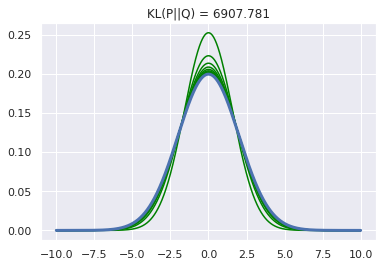

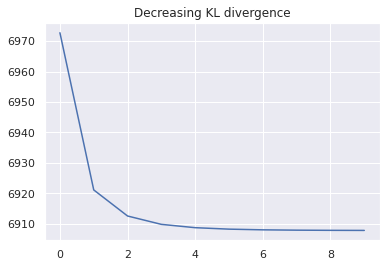

In [ ]:
with tf.Session() as sess:
    sess.run(init)
    
    history = []
    means = []
    variances = []
    
    for i in range(epochs):
        sess.run(optimizer, { p: p_pdf })
        
        if i % 10 == 0:
            history.append(sess.run(kl_divergence, { p: p_pdf }))
            means.append(sess.run(mu)[0])
            variances.append(sess.run(sigma)[0][0])
    
    for mean, variance in zip(means, variances):
        q_pdf = norm.pdf(x, mean, np.sqrt(variance))
        plt.plot(x, q_pdf.reshape(-1, 1), c='green')
    
    plt.title('KL(P||Q) = %1.3f' % history[-1])
    plt.plot(x, p_pdf.reshape(-1, 1), linewidth=3)
    plt.show()
    
    plt.plot(history)
    plt.title('Decreasing KL divergence' % history[-1])
    plt.show()
    
    sess.close()

### Results
We can see that with the incresing epoch we achived small KL divergence. It turns out that there a connection between the K-L divergence and the negative log-likelihood. Minimizing the K-L divergence is equivalent to minimizing the negative log-likelihood, which is equivalent to maximizing the likelihood between the Poisson model and the data.

## Neural Networks training with the loss function of KL divergence

The purpose of the KL divergence term in the loss function is to make the distribution of the encoder output as close as possible to a standard multivariate normal distribution. In the following, we will consider an autoencoder with a latent space of dimension 2. As a reference, let’s first plot points sampled from the standard multivariate normal distribution in the two-dimensional case.

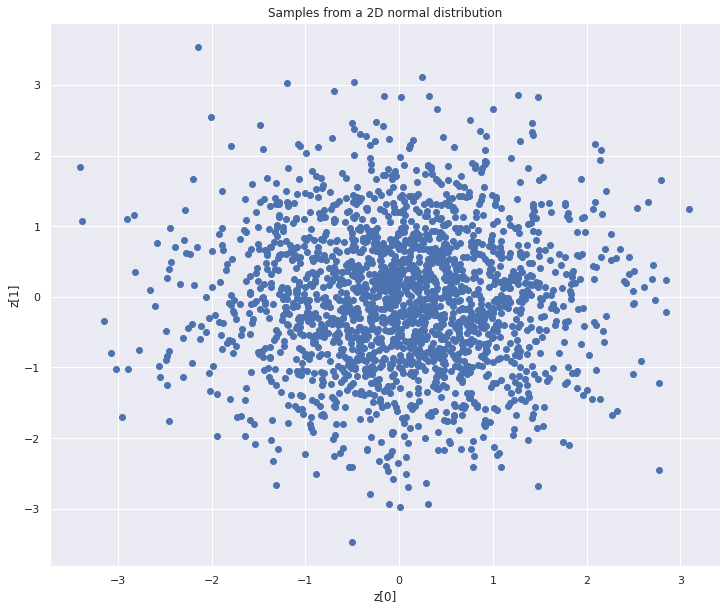

In [45]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
z = np.random.multivariate_normal([0] * 2, np.eye(2), 2000)
plt.scatter(z[:, 0], z[:, 1])
plt.xlabel("z[0]")
plt.ylabel("z[1]")
plt.title('Samples from a 2D normal distribution')
plt.show()

Now we will show how the KL divergence influence both the encoder and decoder ouputs. We add a coefficient c to the KL divergence. The loss function therefore becomes loss = reconstruction_loss + c * kl_loss. We look at the result for different values of c.

In [46]:
from keras.layers import Lambda, Input, Dense
from keras.models import Model
from keras.datasets import mnist
from keras.losses import binary_crossentropy
from tensorflow.keras.optimizers import Adam
from keras import backend as K

import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm

def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    # by default, random_normal has mean = 0 and std = 1.0
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon


def plot_results(models,
                 data,
                 kl_coefficient,
                 batch_size=128):
    encoder, decoder = models
    x_test, y_test = data

    # display a 2D plot of the digit classes in the latent space
    z_mean, _, _ = encoder.predict(x_test,
                                   batch_size=batch_size)
    plt.figure(figsize=(12, 10))
    plt.scatter(z_mean[:, 0], z_mean[:, 1], c=y_test)
    plt.colorbar()
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.title(f'Encoder output for KL coefficient = {kl_coefficient}', fontdict={'fontsize': 'xx-large'})
    plt.show()

    print('\n')
    
    # display a 30x30 2D manifold of digits
    n = 8
    digit_size = 28
    figure = np.zeros((digit_size * n, digit_size * n))
    # linearly spaced coordinates corresponding to the 2D plot
    # of digit classes in the latent space
    grid_x = np.linspace(-3, 3, n)
    grid_y = np.linspace(-3, 3, n)[::-1]

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = decoder.predict(z_sample)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[i * digit_size: (i + 1) * digit_size,
                   j * digit_size: (j + 1) * digit_size] = digit

    plt.figure(figsize=(10, 10))
    start_range = digit_size // 2
    end_range = (n - 1) * digit_size + start_range + 1
    pixel_range = np.arange(start_range, end_range, digit_size)
    sample_range_x = np.round(grid_x, 1)
    sample_range_y = np.round(grid_y, 1)
    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.imshow(figure, cmap='Greys_r')
    plt.title(f'Decoder output for KL coefficient = {kl_coefficient}', fontdict={'fontsize': 'xx-large'})
    plt.show()

    
def build_model(input_shape, intermediate_dim, latent_dim, original_dim):
    # VAE model = encoder + decoder
    # build encoder model
    inputs = Input(shape=input_shape, name='encoder_input')
    x = Dense(intermediate_dim, activation='relu')(inputs)
    z_mean = Dense(latent_dim, name='z_mean')(x)
    z_log_var = Dense(latent_dim, name='z_log_var')(x)

    # use reparameterization trick to push the sampling out as input
    # note that "output_shape" isn't necessary with the TensorFlow backend
    z = Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])

    # instantiate encoder model
    encoder = Model(inputs, [z_mean, z_log_var, z], name='encoder')

    # build decoder model
    latent_inputs = Input(shape=(latent_dim,), name='z_sampling')
    x = Dense(intermediate_dim, activation='relu')(latent_inputs)
    outputs = Dense(original_dim, activation='sigmoid')(x)

    # instantiate decoder model
    decoder = Model(latent_inputs, outputs, name='decoder')

    # instantiate VAE model
    outputs = decoder(encoder(inputs)[2])
    vae = Model(inputs, outputs, name='vae_mlp')

    models = (encoder, decoder)

    reconstruction_loss = binary_crossentropy(inputs, outputs)
    reconstruction_loss *= original_dim
    reconstruction_loss = K.mean(reconstruction_loss)

    kl_loss = 1 + z_log_var - K.square(z_mean) - K.exp(z_log_var)
    kl_loss = K.sum(kl_loss, axis=-1)
    kl_loss *= -0.5
    kl_loss = K.mean(kl_loss)
    
    return vae, models, reconstruction_loss, kl_loss

————————————————————————————————————————————————————————————————————————————————
KL coefficient: 0


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)
Training: 100%|██████████| 40/40 [05:05<00:00,  7.64s/it]
/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


Test loss: {test_losses[0]}, Reconstruction loss: {test_losses[1]}, KL loss: {test_losses[2]}


/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2079: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


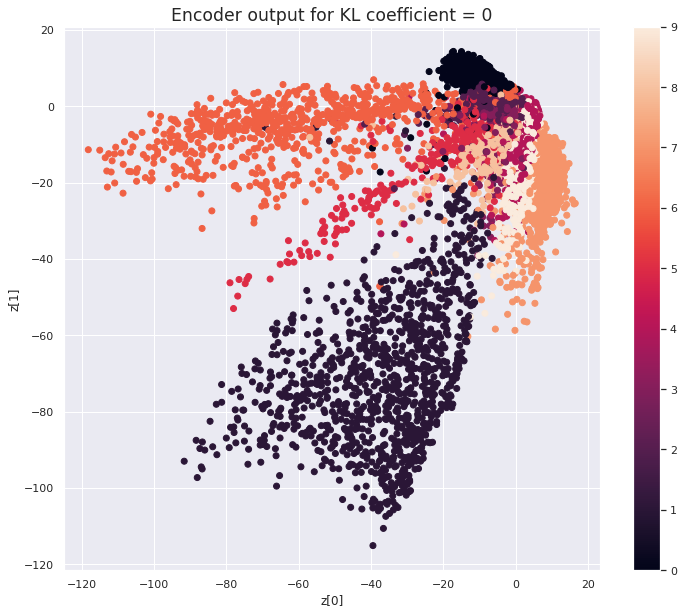

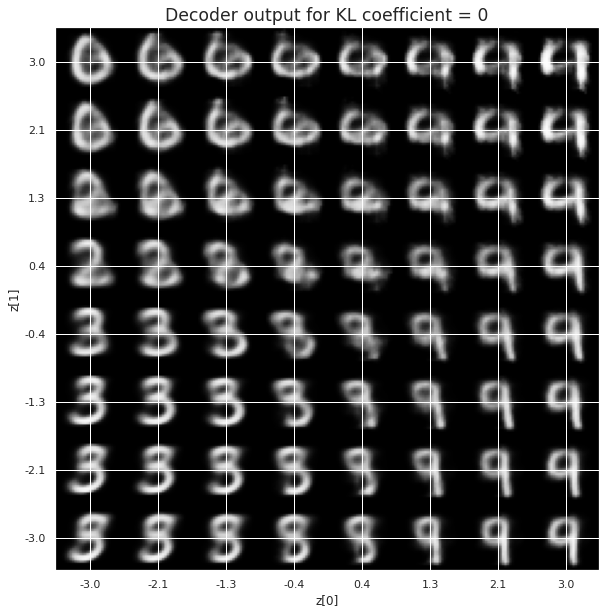

————————————————————————————————————————————————————————————————————————————————
KL coefficient: 0.02


Training: 100%|██████████| 40/40 [05:02<00:00,  7.56s/it]


Test loss: {test_losses[0]}, Reconstruction loss: {test_losses[1]}, KL loss: {test_losses[2]}


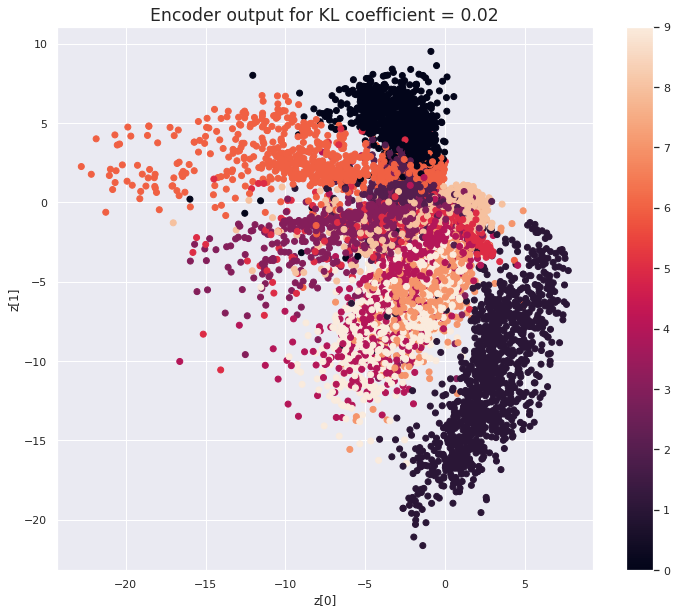

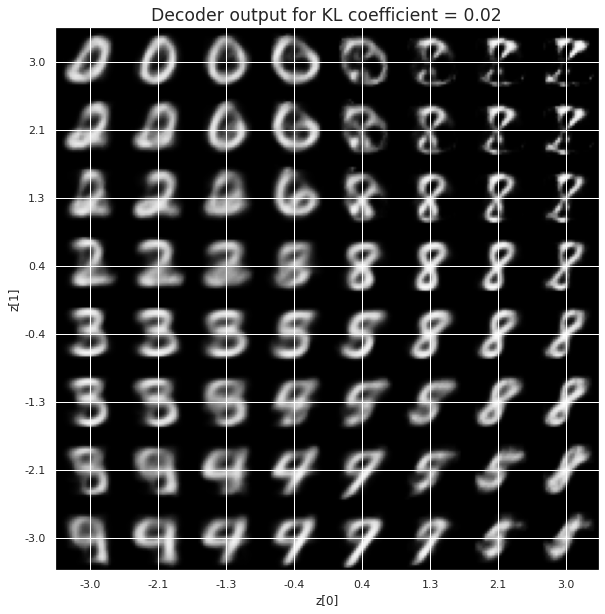

————————————————————————————————————————————————————————————————————————————————
KL coefficient: 1


Training: 100%|██████████| 40/40 [05:02<00:00,  7.55s/it]


Test loss: {test_losses[0]}, Reconstruction loss: {test_losses[1]}, KL loss: {test_losses[2]}


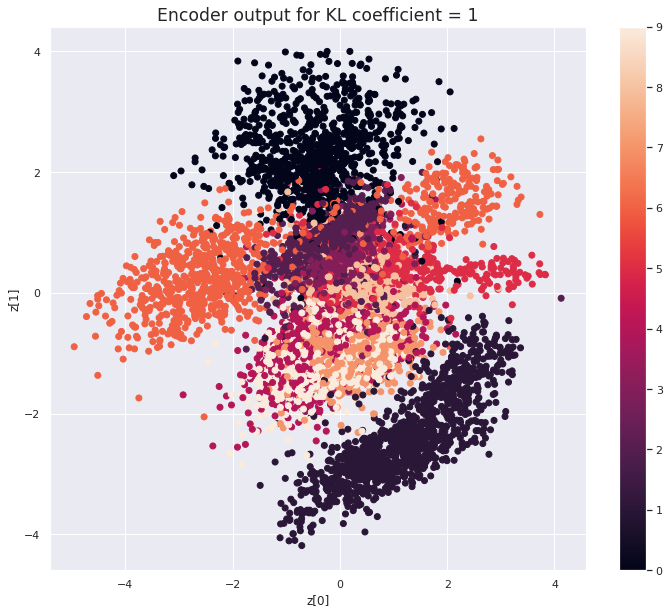

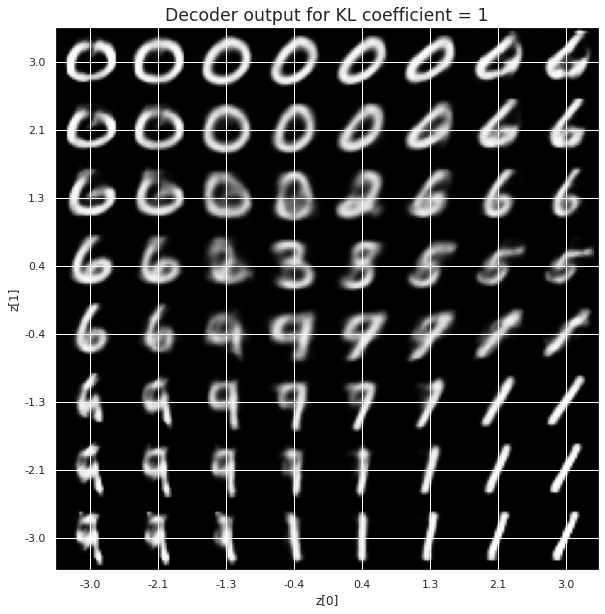

————————————————————————————————————————————————————————————————————————————————
KL coefficient: 2


Training: 100%|██████████| 40/40 [05:00<00:00,  7.51s/it]


Test loss: {test_losses[0]}, Reconstruction loss: {test_losses[1]}, KL loss: {test_losses[2]}


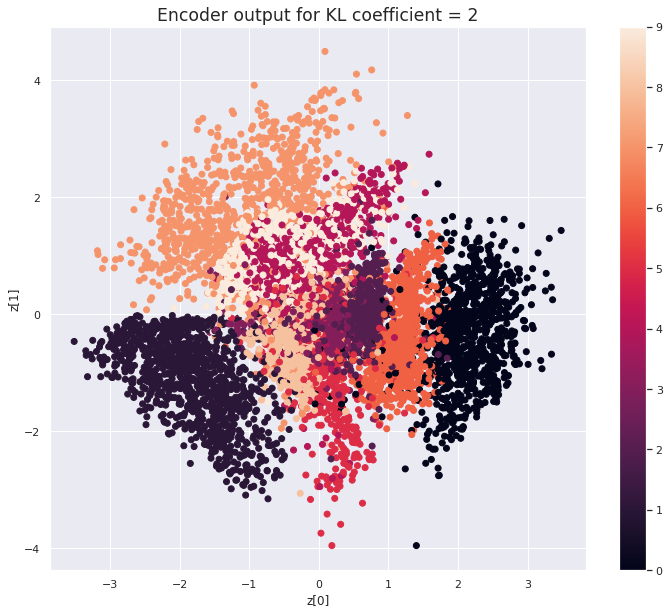

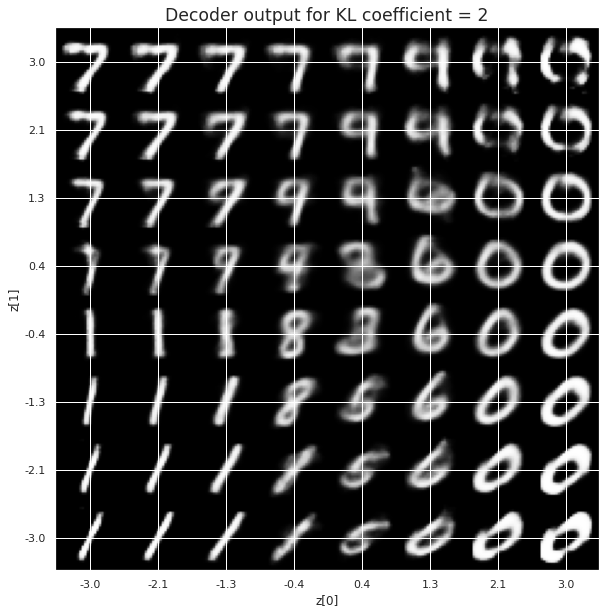

————————————————————————————————————————————————————————————————————————————————
KL coefficient: 20


Training: 100%|██████████| 40/40 [05:00<00:00,  7.51s/it]


Test loss: {test_losses[0]}, Reconstruction loss: {test_losses[1]}, KL loss: {test_losses[2]}


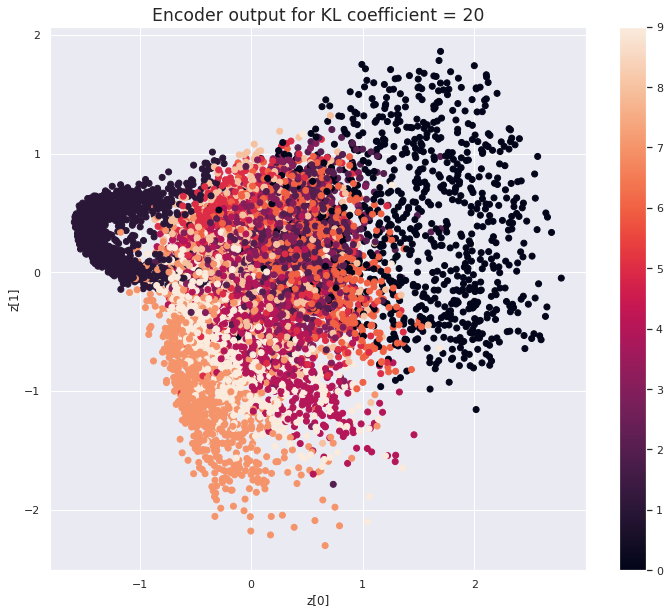

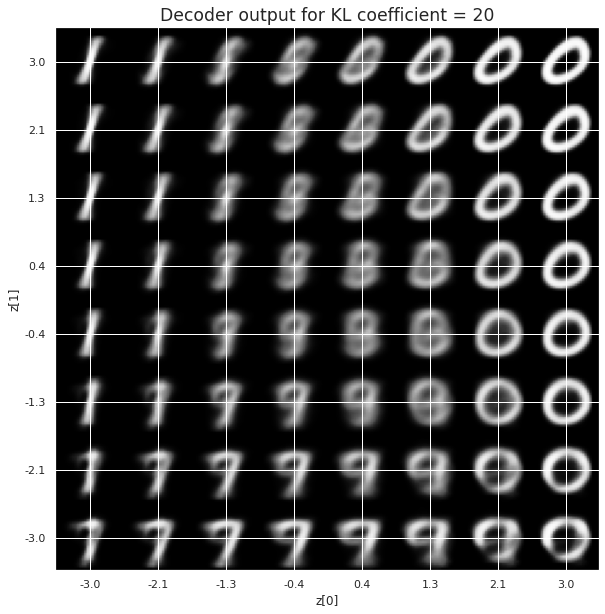

In [49]:
# MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

image_size = x_train.shape[1]
original_dim = image_size * image_size
x_train = np.reshape(x_train, [-1, original_dim])
x_test = np.reshape(x_test, [-1, original_dim])
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# network parameters
input_shape = (original_dim, )
intermediate_dim = 256
batch_size = 128
latent_dim = 2
epochs = 40

data = (x_test, y_test)

vae, _, _, _ = build_model(input_shape, intermediate_dim, latent_dim, original_dim)
vae.save_weights('vae_init.h5')

for kl_coefficient in [0, 0.02, 1, 2, 20]:
    print('—' * 80)
    print('KL coefficient:', kl_coefficient, flush=True)
    vae, models, reconstruction_loss, kl_loss = build_model(input_shape, intermediate_dim, latent_dim, original_dim)
    vae.load_weights('vae_init.h5')
    vae_loss = reconstruction_loss + kl_coefficient * kl_loss
    vae.add_loss(vae_loss)
    vae.compile(optimizer=Adam(lr=1e-3))
    vae.metrics .append(reconstruction_loss)
    vae.metrics_names.append("reconstruct")
    vae.metrics .append(kl_loss)
    vae.metrics_names.append("kl")

    for epoch in tqdm(range(epochs), desc='Training'):
        vae.fit(x_train,
                epochs=1,
                batch_size=batch_size,
                verbose=0)
    test_losses = vae.evaluate(data[0], verbose=0)
    print('Test loss: {test_losses[0]}, Reconstruction loss: {test_losses[1]}, KL loss: {test_losses[2]}')
    plot_results(models, data, kl_coefficient, batch_size)

### Results
As for the decoder output, a big coefficient gives a result with many blurry values and only a few digits. A very small coefficient doesn’t seem to generate all the digits either. When the KL loss is not used or when coefficient = 0, the output values of the encoder are really scattered. When increasing the coefficient, the values start to gather around the origin. While far from being perfect, we see that a correctly chosen coefficient helps to get a result closer to the reference plot of the 2D standard multivariate normal distribution. Overall, average coefficients such as 1 and 2 seem to provide the best result.

## Conclusion
KL divergence is one of the most important Metrics of measure of similarity and difference between the distribuations. There is also a symmetric version of KL divergence known as Jensen-Shannon Divergence. For better understanding we tried to compare results of both KL divergence and JS divergence.

We Also Implemented Minimizing KL Divergence of Normal Distribuation using Gradient Descent in Tensorflows and ploted results of training and showing how achiving minimum KL divergence. It turns out that there a connection between the K-L divergence and the negative log-likelihood. Minimizing the K-L divergence is equivalent to minimizing the negative log-likelihood, which is equivalent to maximizing the likelihood between the model and the data.

We used it also in Neural networks training as a loss function, as explained above with suitable KL divergence cofficient we can acheive better training and better output results in Neural Networks.


## Refferences


1.   List item
2.   List item
3.   [Kullback–Leibler divergence in Variational Autoencoders](https://www.vincent-lunot.com/post/on-the-use-of-the-kullback-leibler-divergence-in-variational-autoencoders/)
4.   [Calculate the KL Divergence for Machine Learning](https://machinelearningmastery.com/divergence-between-probability-distributions/)
5.   [KL Divergence, TowardsDataScience](https://towardsdatascience.com/kl-divergence-python-example-b87069e4b810)

